In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from policy_evaluator_moss_anytime import policy_evaluator_moss_anytime_random, policy_evaluator_moss_anytime_min

In [4]:
data = pd.read_csv('../Data/dataset_1000_minimum_reviews.csv', index_col='Unnamed: 0')
df = data[['time', 'movie_id', 'user_id', 'binary_rating']]
df.head()

,time,movie_id,user_id,binary_rating
0,0,1197,3669,0
1,1,780,3621,0
2,2,1234,4917,0
3,3,1544,1147,0
4,4,3175,262,1


In [345]:
payoffs1 = policy_evaluator_moss_anytime_random(df, alpha=1.35)

In [346]:
payoffs2 = policy_evaluator_moss_anytime_min(df, alpha=1.35)

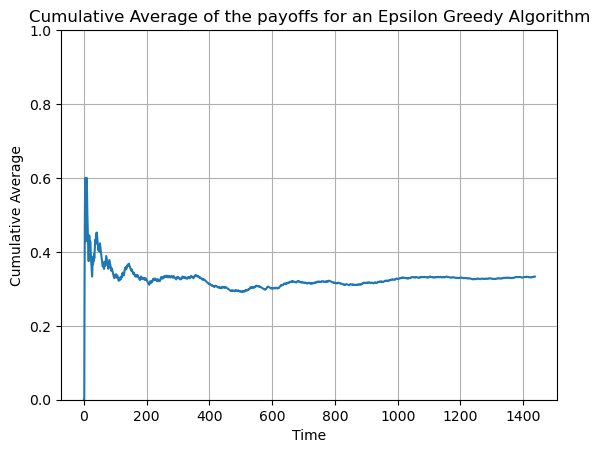

In [347]:
cumulative_average = np.cumsum(payoffs1) / np.arange(1, len(payoffs1)+1)

plt.plot(cumulative_average)
plt.xlabel("Time")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of the payoffs for Moss-Anytime Algorithm (alpha = 1.35)")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

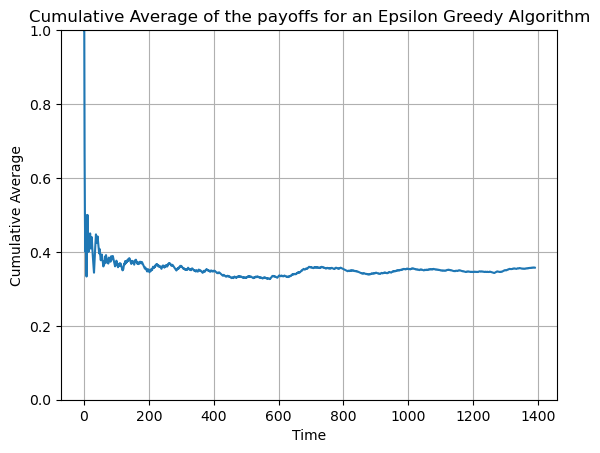

In [348]:
cumulative_average = np.cumsum(payoffs2) / np.arange(1, len(payoffs2)+1)

plt.plot(cumulative_average)
plt.xlabel("Time")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of the payoffs for Moss-Anytime Algorithm (alpha = 1.35)")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

No differences between both algorithm, we thus decide to keep the argmin

In [361]:
alpha_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.35]

In [ ]:
for alpha_value in alpha_values:
    payoffs = policy_evaluator_moss_anytime_min(df, alpha=alpha_value)
    pd.DataFrame(payoffs).to_csv(f'../Plots/Data/moss_anytime/moss_anytime_{alpha_value}.csv')